# Question 1: Using Enron data-set, perform 3 analysis

In [22]:
#Looping over all the files
path = 'C:/Users/hp/Desktop/2nd Sem Northeastern University/Data Analysis Using Python/maildir/'
import os
import glob
#b = [f for f in os.listdir(path1)]
d = os.listdir(path)
userlist = []
for users in d:
    x = os.path.join(path,users)
    m = os.listdir(x)
    for z in m:
        a = os.path.join(x,z)
        if a.endswith('\_sent_mail'):
            userlist.append(a)
               #print(userlist)
#k = [x[0] for x in a]

In [229]:
#def files(a):
    
    #for file in os.listdir(a):
        #if not file.startswith('.'):
            #if os.path.isfile(os.path.join(a, file)):
                #yield file

In [23]:
wholelist =[]
for file in userlist:
    d = glob.glob(file + '\\' + '*')
    #print(d)

In [24]:
from email.parser import Parser 
allFrom =[]
allTo = []
main = []
from_dict = {}
for i in range (0,len(d)):
    for x in d:
        if os.path.isfile(x):
            with open(x,'r',encoding='utf-8', errors = 'ignore') as f:
                n=f.read()
                em = Parser().parsestr(n)
                allFrom.append(em['From'])
#print(allFrom)
#main.extend(allFrom)

# Analysis 1: 

In [25]:
import csv
from_dict = {}
from collections import Counter
file_csv = open('C:/Users/hp/Desktop/2nd Sem Northeastern University/Data Analysis Using Python/Midterm Assignment/Midterm_Question1_Analysis1/From Content.csv','w',newline = "", encoding = 'utf-8', errors = 'ignore')
write_csv = csv.writer(file_csv)
write_csv.writerow(['Email Ids','Count'])
for fromid in main:
    if fromid not in from_dict:
        from_dict[fromid] = 1
    else:
        from_dict[fromid] += 1
#print(from_dict)
count = Counter(from_dict)
final = count.most_common()
#print(final)
for i in range (0,len(final)):
    for b in final:
        #print(b[0])
        write_csv.writerow([b[0],b[1]])

# Analysis 2:

In [34]:
year_list = []
email_year = {}
content =''
file_csv = open('C:/Users/hp/Desktop/2nd Sem Northeastern University/Data Analysis Using Python/Midterm Assignment/Midterm_Question1_Analysis1/Years_Count.csv','w',newline = "", encoding = 'utf-8', errors = 'ignore')
write_csv = csv.writer(file_csv)
write_csv.writerow(['Year','Count'])
for i in range (0,len(d)):
    for x in d:
        if os.path.isfile(file): 
            with open(x, "r") as f:
                new = f.read()
                email_data= Parser().parsestr(new)
                ########## count of emails for each year and each month ################
                time_stamp = email.utils.parsedate(email_data['date'])
                #print(date[0])
                year_list.append(time_stamp[0])
                year = time_stamp[0]
                #month = time_stamp[1]
                if year not in email_year:
                    email_year[year] = {}
                    #email_year[year][month] = 1
                    email_year[year]['count'] = 1
                else:
                    email_year[year]['count'] += 1
                    #if month not in email_year[year]:
                     #   email_year[year][month] = 1
                    #else:
                     #   email_year[year][month] += 1
count = Counter(email_year)
final_count = count.most_common()
#print(final_count)
for i in range (0,len(final_count)):
    for b in final_count:
        #print(b[0])
        write_csv.writerow([b[0],b[1]])
#print(email_year)                
#print(list(set(year)))

# Analysis 3:

In [178]:
allSub = ''
for i in range (0,len(d)):
    for x in d:
        if os.path.isfile(x):
            with open(x,'r',encoding='utf-8', errors = 'ignore') as f:
                n=f.read()
                em = Parser().parsestr(n)
                allSub = allSub + em['Subject']
                #allSub.append(em['Subject'])
#print(allSub)

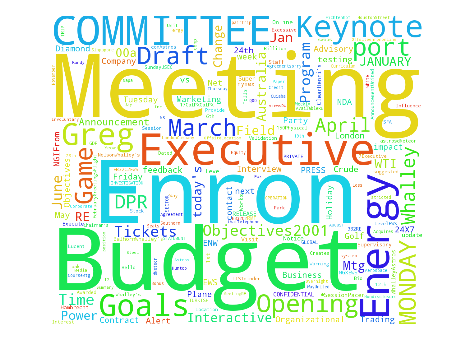

In [179]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

allSub = allSub.replace('Re', '')
allSub = allSub.replace('FW', '')
allSub = allSub.replace('Fw', '')
allSub = allSub.replace('Fwd', '')

wordcloud = WordCloud(
                        stopwords=STOPWORDS,
                        background_color='white',
                        width=1200,
                        height=1000
                        ).generate(allSub)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()